In [20]:
#Loading relevant modules 
import numpy as np
import matplotlib as plt 
import pandas as pd 
from scipy import stats 
import matplotlib.pyplot as plt

In [21]:
#Importing the data 
df = pd.read_csv("diabetic_data.csv")


In [22]:
'''Data Cleaning'''

#The shape of the dataframe 
print(df.shape) 

#Replace all missing values
df.replace('?',np.nan,inplace=True) #Replace ? with NaN 
df.replace(r'^\s*$', np.nan, regex=True, inplace=True) #Replace empty space with NaN

min50= float(0.5*(df.shape[0]+1)) #create object with value of 50% row total
df= df.dropna(axis=1,thresh=min50) #drop columns with values missing from 50% of rows 
df.dropna(axis=0,how='any') #drop any rows with missing values 



#drop columns with 95% same values 
col_heads=list(df.columns)
df['age'].value_counts(dropna=False) #returns each value with list of counts 
min95=float(0.95*(df.shape[0]+1)) #determine 95% of values 
for column in col_heads: #for each column in col_heads 
    mylist= df[column].value_counts(dropna=False) #make a list of counts for each value found in the column
    for x in mylist: #for each value (count no. of each value in col)
        if x >= min95: #if the value is present in 95% of rows 
            df.drop(axis=1,columns=column,inplace=True)
            statement= 'dropping column: {}'.format(column)
            print(f"Droppinf column {column}")

#Shape of dataframe after column removal 
print(df.shape)

(101766, 50)
Droppinf column repaglinide
Droppinf column nateglinide
Droppinf column chlorpropamide
Droppinf column acetohexamide
Droppinf column tolbutamide
Droppinf column acarbose
Droppinf column miglitol
Droppinf column troglitazone
Droppinf column tolazamide
Droppinf column examide
Droppinf column citoglipton
Droppinf column glyburide-metformin
Droppinf column glipizide-metformin
Droppinf column glimepiride-pioglitazone
Droppinf column metformin-rosiglitazone
Droppinf column metformin-pioglitazone
(101766, 33)


In [23]:
#Transforming the age column to middle value
ages = df["age"]
middle_age_value = [int(age.split("-")[1].strip(")"))-5 for age in ages]
series = pd.Series(middle_age_value)
df["age"] = series 
df.head(5)

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,...,metformin,glimepiride,glipizide,glyburide,pioglitazone,rosiglitazone,insulin,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,5,6,25,1,1,NaN,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,15,1,1,7,3,NaN,...,No,No,No,No,No,No,Up,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,25,1,1,7,2,NaN,...,No,No,Steady,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,35,1,1,7,2,NaN,...,No,No,No,No,No,No,Up,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,45,1,1,7,1,NaN,...,No,No,Steady,No,No,No,Steady,Ch,Yes,NO


In [24]:
#Replacing missing values in columns diag_1/2/3 
df["diag_1"].fillna(0, inplace=True)
df["diag_2"].fillna(0, inplace=True)
df["diag_3"].fillna(0, inplace=True)

In [25]:
#List of numerical and categorical features  
col_heads=list(df.columns)
catlist= df.select_dtypes(object).columns.values.tolist()
numlist= df.select_dtypes(np.number).columns.values.tolist()

for col in numlist:
    if col[-2:]=='id':
        numlist.remove(col)
        catlist.append(col)

print(f'Numerical columns are: {numlist}')       

Numerical columns are: ['patient_nbr', 'age', 'discharge_disposition_id', 'time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses']


In [26]:
print(f'Categorical columns are: {catlist}')

Categorical columns are: ['race', 'gender', 'payer_code', 'medical_specialty', 'diag_1', 'diag_2', 'diag_3', 'max_glu_serum', 'A1Cresult', 'metformin', 'glimepiride', 'glipizide', 'glyburide', 'pioglitazone', 'rosiglitazone', 'insulin', 'change', 'diabetesMed', 'readmitted', 'encounter_id', 'admission_type_id', 'admission_source_id']


In [37]:
#Removing duplicates in the column patient_nbr 
df = df.drop_duplicates(subset='patient_nbr',keep='first')
df.shape

(41598, 34)

In [36]:
#Identifying and removing outliers in the numerical columns
#df2=df.copy() #create a copy to identify outliers 
#for col in numlist: #for each numerical column... 
#    z= np.abs(stats.zscore(df[col])) #calculate a z score 
 #   df2[col]=z #define a new column with z scores 
  #  myindex=df2[(df2[col]>3)].index #index depending on whether or not values deviate > 3 sds from mean 
   # df.drop(myindex,inplace=True) #drop all rows with numerical values > 3 sd from mean 
df.shape

clean_test = df
threshold = 3
ls = []
for column in numlist:
    z = np.abs(stats.zscore(clean_test[column]))
    #zscpres
    clean_test[column] = z
    index_names = clean_test[(clean_test[column]>3)].index
    #dataframe
    df.drop(index_names, inplace=True)
df.shape

(41598, 34)

In [29]:
'''Data Exploration'''

#joining icd codes datasetwith diabertic dataset 
#finding the icd dcode descirption frmo the diabetic data set and icd codes
icd_codes = pd.read_csv("icd_codes.csv")

def fill_icd_description(diag_column,data,icd_data):
    desc_array = []
    diag_col = data[diag_column]
    for code in diag_col:
        icd_loc = icd_data[icd_data["ICD_Code"]==code].index.values # get the index of the icd_code in the diabetic dataset
        icd_desc = icd_data["Description"][icd_loc].values
        try: #try -exception hnalding to find out if there are any codes in the maind taframe that do not hajve descirpotion
            icd_desc_string = icd_desc[0]
        except IndexError:
            desc_array.append('0')
        else:
            desc_array.append(icd_desc_string)
    return desc_array

diag_1_col = fill_icd_description('diag_1', df, icd_codes)

##adding the descrption to eahc diangosis column
df['diag_1_desc'] = diag_1_col

/home/solomon/miniconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


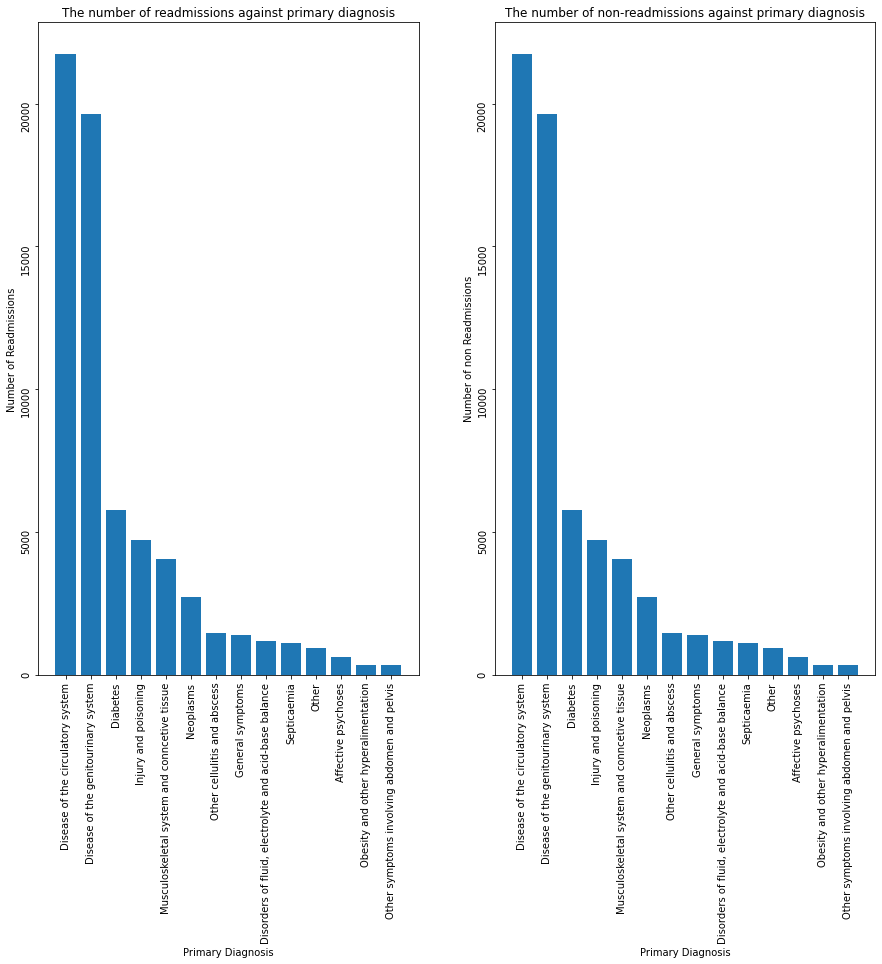

In [30]:
#icd codes
#Grouping icd code descirptions based on types of diagnoses 

desc_dict = {'Disease of the circulatory system': (390,459,785),
                  'Diabetes' : (250,251),
                  'Disease of the respiratory system' : (460,519,786),
                  'Disease of the digestive sytem' : (520, 579, 787),
                  'Injury and poisoning': (800,999),
                  'Musculoskeletal system and conncetive tissue': (710,739),
                  'Disease of the genitourinary system': (500, 629, 788),
                  'Neoplasms' : (140,239)}

def transform_icd_description(dictionary,data):
    #convert icd codees to numeric datatype for grouping
    diag_1 = data['diag_1']
    diag_1_desc = data['diag_1_desc']
    diag_1 = pd.to_numeric(diag_1, errors="coerce")
    diag_1.replace(np.nan, 0, inplace=True)
    data["diag_1"] = diag_1
    
    #data['diag_1_desc'].loc[index_other] = 'Other'

    #Replace Icd codes of 0 to te description other
    index_other = data[data["diag_1"]==0].index
    df["diag_1_desc"].loc[index_other] = "Other"
    
    #replace icd_description with descirption witihn the dictionary 
    
    for k,v in list(dictionary.items()):
        if len(v) == 3:
            index = data["diag_1"].loc[(data["diag_1"] >= v[0]) & (data["diag_1"] <= v[1]) | (data["diag_1"] == v[2])].index
            vals = np.unique(data["diag_1_desc"].loc[index].values)
            data["diag_1_desc"].replace(vals, k, inplace=True)
        elif len(v) == 2:
            index = data["diag_1"].loc[(data["diag_1"] >= v[0]) & (data["diag_1"] <= v[1])].index
            vals = np.unique(df["diag_1_desc"].loc[index].values)
            data["diag_1_desc"].replace(vals,k, inplace=True)
            
        #clip description that occur in the data that occur less than hald of % of the over all data
    half_percent = len(df) * 0.005
    count = data["diag_1_desc"].value_counts()
    filtered = data[data["diag_1_desc"].isin(count.index[count.gt(half_percent)])]
    
    #clip description that occur in the data that occur less than hald of % of the over all data
    half_percent = len(df) * 0.005
    count = data["diag_1_desc"].value_counts()
    filtered = data[data["diag_1_desc"].isin(count.index[count.gt(half_percent)])]
    
    return filtered

   


def plot_diag(data):
    fig, (ax1,ax2) = plt.subplots(1,2, figsize=(15,12))
    
    #admitted
    grouped = data[data["readmitted"]!=0]
    icd_grouped = grouped.groupby("diag_1_desc").count()
    sorted_grouped = icd_grouped.sort_values(["readmitted"],ascending=False)
    index = sorted_grouped.index
    readmitted_column = sorted_grouped["readmitted"].values
    ax1.bar(index,readmitted_column)
    ax1.tick_params(labelrotation=90)
    ax1.set(xlabel = "Primary Diagnosis")
    ax1.set(ylabel = "Number of Readmissions")
    ax1.set_title("The number of readmissions against primary diagnosis")
    
    # not admitted
    non_grouped = data[data["readmitted"]==0]
    icd_non_grouped = non_grouped.groupby("diag_1_desc").count()
    sorted_non_grouped = icd_non_grouped.sort_values(["readmitted"],ascending=False)
    non_index = sorted_non_grouped.index
    non_readmitted_column = sorted_non_grouped["readmitted"].values
    ax2.bar(index,readmitted_column)
    ax2.tick_params(labelrotation=90)
    ax2.set(xlabel = "Primary Diagnosis")
    ax2.set(ylabel = "Number of non Readmissions")
    ax2.set_title("The number of non-readmissions against primary diagnosis")
    plt.xticks(rotation = 90)
    plt.show
    
#df.drop("diag_1_desc",axis=1)
icd_dataframe = transform_icd_description(desc_dict, df)
plot_diag(icd_dataframe)

(41598, 34)